In [1]:
import mnist_reader
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#X_train, y_train = mnist_reader.load_mnist('', kind='train')
X_test, y_test = mnist_reader.load_mnist('', kind='t10k') 
#We load both X and Y but we are only going to use X, not the labels

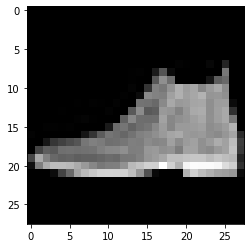

In [2]:
img = np.reshape(X_test[0], (28, 28))
plt.imshow(img,cmap = 'gray')

In [3]:
#Centering the data
X_mean = X_test.mean(axis=0)
X_centered = X_test-X_mean


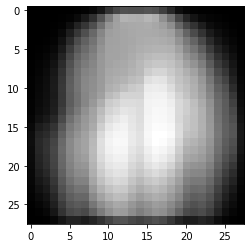

In [4]:
k = np.reshape(X_mean,(28,28))
plt.imshow(k,cmap = 'gray')

In [5]:
U,S,VT = np.linalg.svd(X_centered)
print("U.shape, S.shape, V.T.shape ->", U.shape, S.shape, VT.shape, end="\n\n")

U.shape, S.shape, V.T.shape -> (10000, 10000) (784,) (784, 784)



In [20]:
i=k=0;
for i in range(50):
    k = k+S[i]
print("Cummulative Explained Variance:")    
print(k/np.sum(S)*100,"%")

Cummulative Explained Variance:
36.23568446836684 %


In [7]:
print(VT[:50:,].shape)

(50, 784)


In [8]:
X_PCA = np.matmul(X_centered, np.transpose(VT[:50,:]))

In [9]:
print(X_PCA.shape)

(10000, 50)


In [10]:
temp = np.matmul(X_PCA,VT[:50,:]) #Reproject
ans = temp + X_mean  #Uncenter the images


In [11]:
print(ans.shape)

(10000, 784)


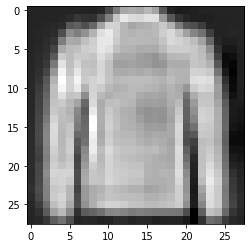

In [12]:
img1 = np.reshape(ans[50], (28, 28)) #Reprojected Image
plt.imshow(img1,cmap = 'gray')

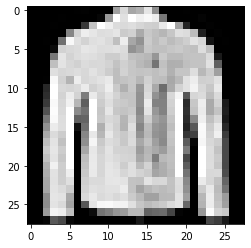

In [13]:
img = np.reshape(X_test[50], (28, 28)) #original image
plt.imshow(img,cmap = 'gray')

In [15]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
model = TSNE(n_components=2, random_state=0,perplexity=50, n_iter=5000)
standarized_data = StandardScaler().fit_transform(X_PCA)
tsne_data = model.fit_transform(standarized_data)

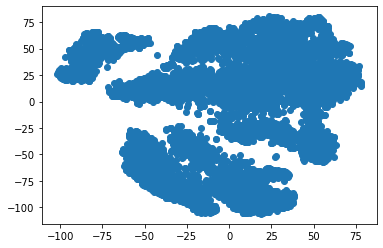

In [16]:
xx = tsne_data[:,0]
yy = tsne_data[:,1]
plt.scatter(xx,yy)
plt.show()

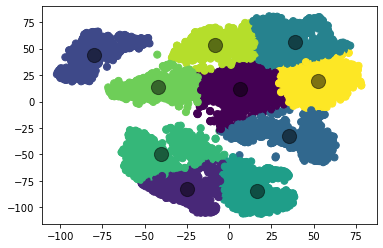

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(tsne_data)
y_kmeans = kmeans.predict(tsne_data)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);